In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data=pd.read_excel(r'C:\Users\noelm\OneDrive\Desktop\iris.xls')  #IMPORT DATA

In [7]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
data.isna().sum() #CHECK WHEATHER THERE IS MISSING VALUE

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

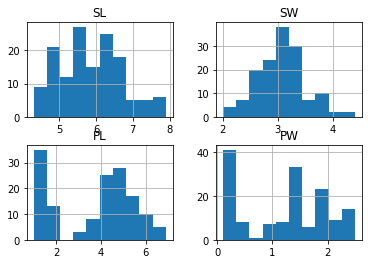

In [10]:
data.hist() #TO KNOW DISTRIBUTION(SKEWED OR NOT)
plt.show()

In [11]:
for i in['SL','SW','PL']:  # TO FILL MISSING VALUES
  data[i]=data[i].fillna(data[i].median())

In [12]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [13]:
data.dtypes # TO KNOW TYPE OF DATA

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder #LABEL ENCODING
label_encoder=LabelEncoder()
data['Classification']=label_encoder.fit_transform(data['Classification'])

In [15]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


In [47]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification      int32
dtype: object

In [16]:
data.describe()

,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667,1.000000
std,0.808567,0.421995,1.729424,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.275000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [17]:
#logisticregression
x=data.drop(['Classification'],axis=1)
y=data['Classification']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [19]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression(random_state=42)
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

C:\Users\noelm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score #ACCURACY
print('Accuracy is',accuracy_score(y_test,y_pred))


Accuracy is 1.0


In [22]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [23]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [24]:
metric_k


[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

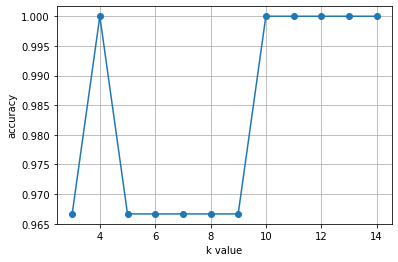

In [25]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [31]:
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [32]:
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 1.0


In [33]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [34]:
#SVM
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [35]:
y_pred=svmclf.predict(x_test)

In [36]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 1.0


In [38]:
#DECISIONTREE

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [41]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [40]:
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 1.0


In [42]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [44]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [45]:
y_pred=rf_clf.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [46]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
